In [28]:
import pandas as pd
import numpy as np
df = pd.read_csv('Combined_DS_v10.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  487 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


In [29]:
#先查看空值
sub_df = df[['Age','Gender']]

# Print the number of non-missing values
print(sub_df.notnull().sum())

#簡單填補空值
df['StackOverflowJobsRecommend'].fillna(df['StackOverflowJobsRecommend'].mean(), inplace=True)

# Round the StackOverflowJobsRecommend values
df['StackOverflowJobsRecommend'] = round(df['StackOverflowJobsRecommend'])

# Print the top 5 rows
print(df['StackOverflowJobsRecommend'].head())

Age       999
Gender    693
dtype: int64
0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [36]:
# Remove the commas in the column
df['RawSalary'] = df['RawSalary'].str.replace(',', '')
# Remove the dollar signs in the column
df['RawSalary'] = df['RawSalary'].str.replace('$','')
df['RawSalary'] = df['RawSalary'].str.replace('£','')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SurveyDate                  999 non-null    object 
 1   FormalEducation             999 non-null    object 
 2   ConvertedSalary             665 non-null    float64
 3   Hobby                       999 non-null    object 
 4   Country                     999 non-null    object 
 5   StackOverflowJobsRecommend  999 non-null    float64
 6   VersionControl              999 non-null    object 
 7   Age                         999 non-null    int64  
 8   Years Experience            999 non-null    int64  
 9   Gender                      693 non-null    object 
 10  RawSalary                   665 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 86.0+ KB


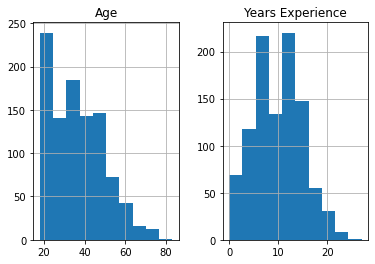

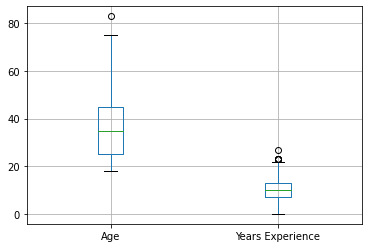

In [37]:
import matplotlib.pyplot as plt
number = df[['RawSalary','Age','Years Experience']]
number.hist()
plt.show()
number.boxplot()
plt.show()

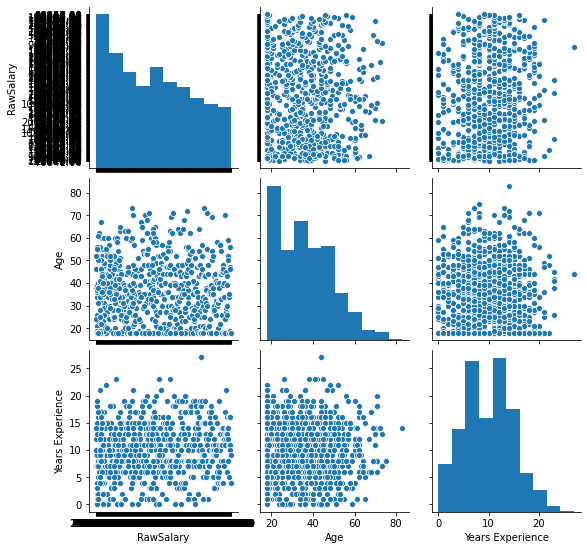

In [22]:
import seaborn as sns
# Plot pairwise relationships
sns.pairplot(number)

# Show plot
plt.show()

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39
     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


<ipython-input-38-d9d340e41f01>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number['Age_MM'] = MM_scaler.transform(number[['Age']])
<ipython-input-38-d9d340e41f01>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  number['Age_SS'] = SS_scaler.transform(number[['Age']])
<ipython-input-38-d9d340e41f01>:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

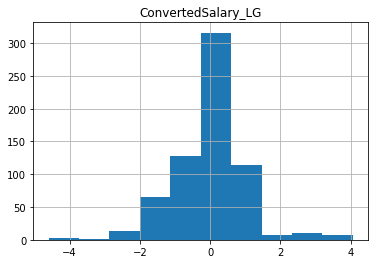

In [38]:
#介紹三種不同的標準化工具
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
MM_scaler = MinMaxScaler()

# Fit MM_scaler to the data
MM_scaler.fit(number[['Age']])

# Transform the data using the fitted scaler
number['Age_MM'] = MM_scaler.transform(number[['Age']])

# Compare the origional and transformed column
print(number[['Age_MM', 'Age']].head())

# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
SS_scaler = StandardScaler()

# Fit SS_scaler to the data
SS_scaler.fit(number[['Age']])

# Transform the data using the fitted scaler
number['Age_SS'] = SS_scaler.transform(number[['Age']])

# Compare the origional and transformed column
print(number[['Age_SS', 'Age']].head())

# Import PowerTransformer
from sklearn.preprocessing import PowerTransformer

# Instantiate PowerTransformer
pow_trans = PowerTransformer()

# Train the transform on the data
pow_trans.fit(number[['RawSalary']])

# Apply the power transform to the data
number['ConvertedSalary_LG'] = pow_trans.transform(number[['RawSalary']])

# Plot the data before and after the transformation
number[['RawSalary', 'ConvertedSalary_LG']].hist()
plt.show()

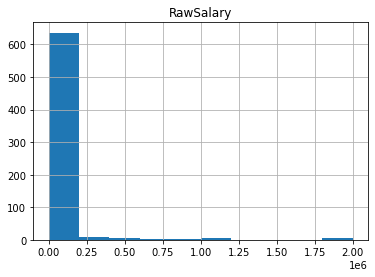

<Figure size 432x288 with 0 Axes>

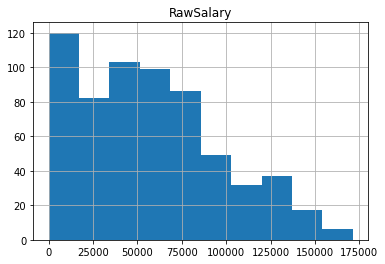

In [46]:
# Find the 95th quantile
quantile = number['RawSalary'].quantile(0.95)

# Trim the outliers
trimmed_df = number[number['RawSalary'] < quantile]

# The original histogram
number[['RawSalary']].hist()
plt.show()
plt.clf()

# The trimmed histogram
trimmed_df[['RawSalary']].hist()
plt.show()